### About Project

We will to apply Time Series FB-Prophet to build model to predict and forecast the Stock Price for TCS for the next one year i.e. stock price in predected based on previously observed values. We have a 12-year Stock price data.

### About Data

Time series analysis comprises different shadule, trends for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

This dataset consists of daily Stock price of TCS.


### About Facebook Prophet
The most commonly used models for forecasting predictions are the autoregressive models. Briefly, the autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term).

Recently, in an attempt to develop a model that could capture seasonality in time-series data, Facebook developed the famous Prophet model that is publicly available for everyone. We will use this state-of-the-art model: the Prophet model. Prophet is able to capture daily, weekly and yearly seasonality along with holiday effects, by implementing additive regression models. The mathematical equation behind the Prophet model is defined as:

y(t) = g(t) + s(t) + h(t) + e(t)

with, g(t) representing the trend. Prophet uses a piecewise linear model for trend forecasting.

s(t) represents periodic changes (weekly, monthly, yearly).

h(t) represents the effects of holidays (recall: Holidays impact businesses).

e(t) is the error term.

The Prophet model fitting procedure is usually very fast (even for thousands of observations) and it does not require any data pre-processing. It deals also with missing data and outliers.

### Installing Prophet

#pip install pystan

#pip install fbprophet

#pip install pystan==2.19.1.1 prophet

## Preprocessing the Data

#### 1.Importing the requred

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)  

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [12]:
from prophet import Prophet

In [5]:
data = pd.read_csv("TCS.NS.csv") 
print(data.head())

         Date        Open        High         Low       Close  Adj Close  \
0  2004-08-25  149.837494  149.837494  122.375000  123.493752  92.474930   
1  2004-08-26  124.000000  124.625000  121.912498  122.375000  91.637184   
2  2004-08-27  122.800003  122.800003  119.820000  120.332497  90.107712   
3  2004-08-30  121.237503  123.750000  120.625000  123.345001  92.363548   
4  2004-08-31  123.312500  123.750000  122.000000  123.512497  92.488968   

       Volume  
0    136928.0  
1  40443200.0  
2  30646000.0  
3  24465208.0  
4  21194656.0  


#### 3.Describing data

In [6]:
print("Data Description")
print(data.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(data.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(data.info())
print("-----------------------------------------------------------------------------------------------")

Data Description
              Open         High          Low        Close    Adj Close  \
count  4070.000000  4070.000000  4070.000000  4070.000000  4070.000000   
mean    917.644542   928.156148   906.372446   917.141210   834.383126   
std     715.504286   722.729269   707.584970   715.011337   709.753664   
min     112.000000   116.112503   103.837502   111.550003    88.550110   
25%     268.562500   272.050003   263.525002   267.206238   207.602928   
50%     655.000000   661.000000   646.837524   654.975006   551.727844   
75%    1282.399994  1295.587494  1271.612518  1282.168701  1156.497222   
max    3308.949951  3339.800049  3278.649902  3308.800049  3308.800049   

             Volume  
count  4.070000e+03  
mean   3.739476e+06  
std    3.325465e+06  
min    0.000000e+00  
25%    1.983859e+06  
50%    2.895070e+06  
75%    4.491241e+06  
max    8.806715e+07  
-----------------------------------------------------------------------------------------------
Number of rows and col

In [7]:
print("Data percentaile")
print(data.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
print("------------ -----------------------------------------------------------------------------------")
print("Checking for null")
print(data.isnull().sum())
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data percentaile
              Open         High          Low        Close    Adj Close  \
count  4070.000000  4070.000000  4070.000000  4070.000000  4070.000000   
mean    917.644542   928.156148   906.372446   917.141210   834.383126   
std     715.504286   722.729269   707.584970   715.011337   709.753664   
min     112.000000   116.112503   103.837502   111.550003    88.550110   
1%      123.851751   126.963374   120.594001   123.703499    95.502831   
2%      128.048597   130.750000   124.579749   127.629749    99.992782   
3%      134.092745   138.146000   129.504375   134.388125   104.320909   
4%      142.440000   145.392996   139.588705   142.072494   108.039545   
5%      149.350247   150.848753   145.863498   149.057126   113.736820   
6%      156.002801   159.231746   153.750000   155.492752   118.564661   
7%      160.103750   162.500000   157.741499   160.378255   121.690827   
8%      164.601999   166.600999   161.430899   164.220001   124.365195   
9%      168.997326   

In [8]:
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset

In [9]:
print(data.head())

           ds           y
0  2004-08-25  123.493752
1  2004-08-26  122.375000
2  2004-08-27  120.332497
3  2004-08-30  123.345001
4  2004-08-31  123.512497


## Predection

In [13]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all dat

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [16]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future

In [17]:
prediction = m.predict(future)

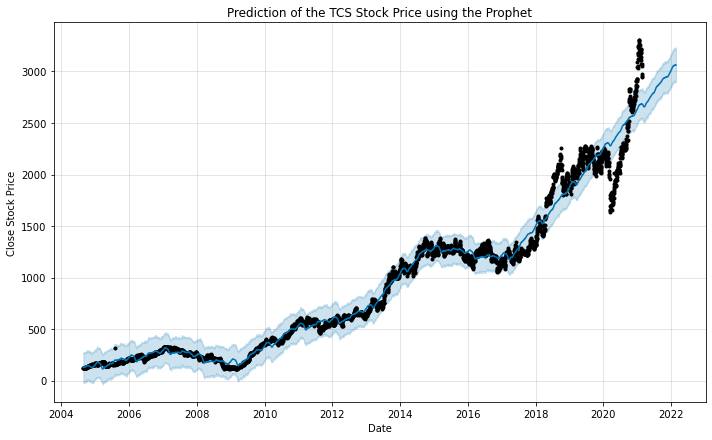

In [18]:
m.plot(prediction)
plt.title("Prediction of the TCS Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

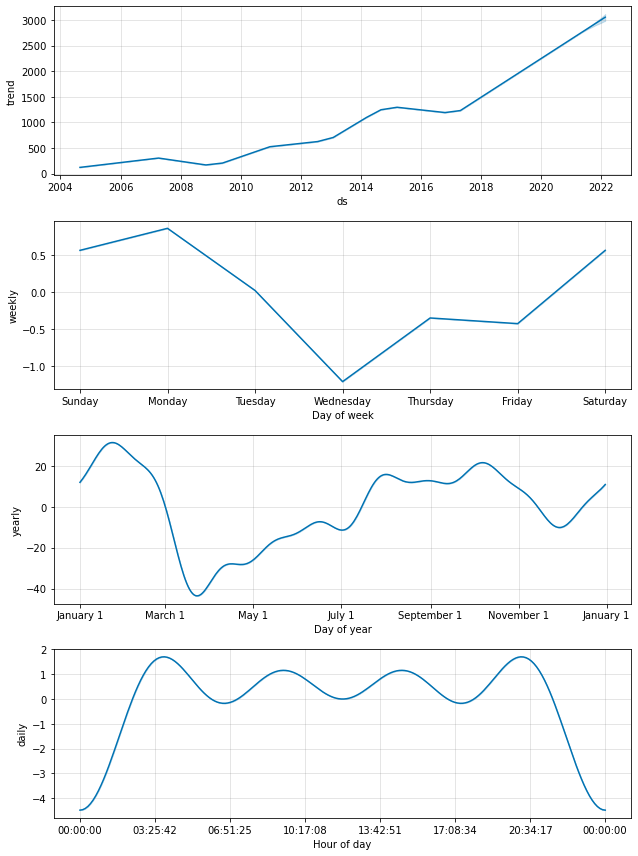

In [19]:
m.plot_components(prediction)
plt.show()

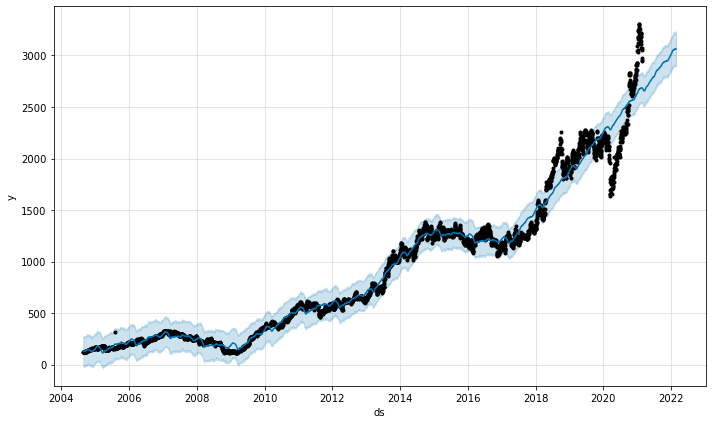

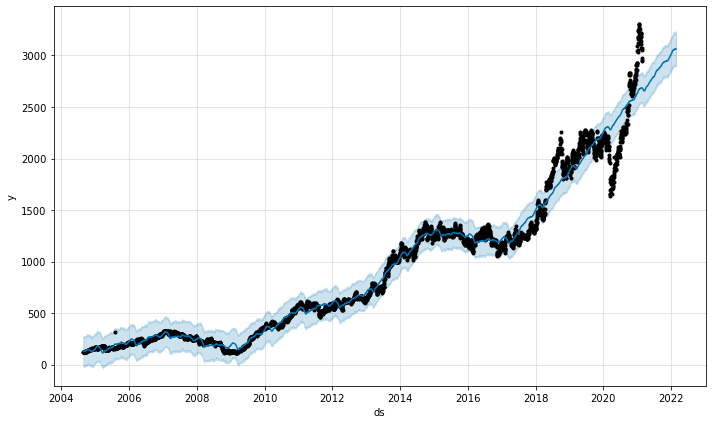

In [23]:
### plot the predicted projection
m.plot(prediction)

In [20]:
print(prediction)

             ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2004-08-25   122.090089   -15.691578   269.733416   122.090089   
1    2004-08-26   122.282298   -10.245742   264.444248   122.282298   
2    2004-08-27   122.474507   -18.451417   277.622579   122.474507   
3    2004-08-30   123.051132   -18.800272   270.023098   123.051132   
4    2004-08-31   123.243341    -4.251175   272.637640   123.243341   
...         ...          ...          ...          ...          ...   
4445 2022-02-20  3052.293558  2902.937906  3221.036084  2982.274553   
4446 2022-02-21  3053.328165  2905.861830  3215.663291  2983.090321   
4447 2022-02-22  3054.362772  2915.049799  3223.635098  2983.906088   
4448 2022-02-23  3055.397379  2895.517206  3214.266732  2984.721856   
4449 2022-02-24  3056.431985  2890.912262  3222.594338  2985.537623   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0      122.090089        6.847272              6.847272           

## Analysing the Result

In [21]:
from prophet.diagnostics import cross_validation

In [22]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
print(df_cv.head())

INFO:prophet:Making 28 forecasts with cutoffs between 2006-11-05 00:00:00 and 2020-02-25 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain

          ds        yhat  yhat_lower  yhat_upper           y     cutoff
0 2006-11-06  268.354569  254.682290  282.405914  264.850006 2006-11-05
1 2006-11-07  268.944479  254.966533  284.021462  266.287506 2006-11-05
2 2006-11-08  269.195230  255.016936  283.786128  265.825012 2006-11-05
3 2006-11-09  271.211981  257.576138  285.472552  265.899994 2006-11-05
4 2006-11-10  270.648730  256.057980  284.105759  267.174988 2006-11-05


In [24]:
from prophet.diagnostics import performance_metrics

In [25]:
df_p = performance_metrics(df_cv)
print(df_p.head())

  horizon           mse        rmse        mae      mape     mdape     smape  \
0 38 days  27460.519311  165.712158  99.635232  0.118706  0.079300  0.121368   
1 39 days  27209.397801  164.952714  99.169391  0.119080  0.078696  0.121829   
2 40 days  26887.984683  163.975561  98.323766  0.119038  0.078583  0.121907   
3 41 days  26697.933173  163.395022  98.079682  0.119597  0.078485  0.122608   
4 42 days  27403.821472  165.540996  99.455677  0.120875  0.078846  0.124055   

   coverage  
0  0.274225  
1  0.277769  
2  0.286594  
3  0.291998  
4  0.293069  


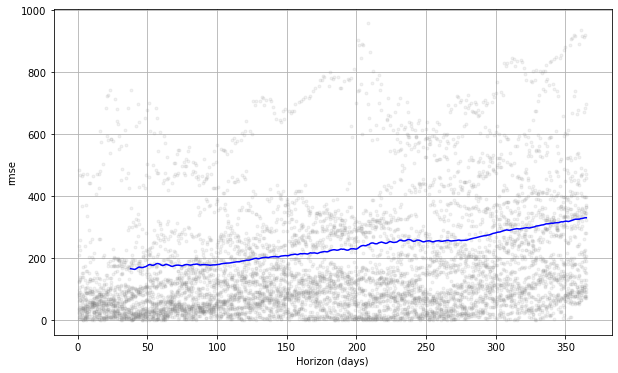

In [26]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### Conclusion :-
Good to see that the Stock for TCS  have been linearly increasing over time although and the growth seems slightly stronger.

The worst month for Stock price is March to May. The best month is January.

There are many time-series analysis we can explore from now on, such as forecast with uncertainty bounds, change point and anomaly detection, forecast time-series with external data source. We have only scratched the surface here. Stay tuned for future works on time-series analysis.